In [42]:
from rnn import MyGRU, MyLSTM, VanillaRNN, RNN
import pandas as pd
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
%load_ext autoreload
%autoreload 2

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 122538197147724303
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4181524480
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4284091965314426178
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
# Download the downsampled data frame from csv-file.
raw_data = pd.read_csv(r'C:\Users\romat\Documents\GitHub\HAMK_Smart_City\data_example.csv')

In [39]:
raw_data

,Unnamed: 0,Ventilation_network_1_main_valve,Ventilation_network_1_secondary_valve,Ventilation_network_2_main_valve,Ventilation_network_2_secondary_valve,Domestic_water_network_1_primary_valve,Domestic_water_network_1_secondary_valve,Domestic_water_network_2_primary_valve,Domestic_water_network_2_secondary_valve,Radiator_network_1_primary_valve,...,Domestic_water_network_1_temperature,Domestic_water_network_2_temperature,Radiator_network_1_temperature,Radiator_network_2_temperature,Outside_humidity,Solar_irradiance,Inside_temperature,Inside_humidity,CO2_concentration,Energy_consumption
0,2021-02-11 00:00:00+00:00,66.210526,0.0,54.105263,0.0,20.000000,0.0,13.105263,0.0,51.877193,...,58.038596,58.014035,56.980702,55.836843,83.666667,0.0,22.408333,13.000000,568.888889,350.0
1,2021-02-11 01:00:00+00:00,66.821429,0.0,54.035714,0.0,19.946429,0.0,13.000000,0.0,52.017857,...,58.028571,58.021428,57.294642,56.255357,83.500000,0.0,22.520000,12.937500,584.944444,350.0
2,2021-02-11 02:00:00+00:00,67.175439,0.0,54.105263,0.0,19.964912,0.0,12.859649,0.0,51.894737,...,58.026315,57.989474,57.485965,56.577193,83.000000,0.0,22.466667,12.847222,587.916667,360.0
3,2021-02-11 03:00:00+00:00,67.053571,0.0,54.000000,0.0,19.696429,0.0,12.767857,0.0,52.000000,...,58.044643,58.001786,57.599999,56.794643,83.000000,0.0,22.366667,10.854167,568.750000,350.0
4,2021-02-11 04:00:00+00:00,67.107143,0.0,53.766667,0.0,19.607143,0.0,12.300000,0.0,52.071429,...,58.038596,58.012281,57.738597,57.064912,83.666667,0.0,22.150000,9.173611,587.083333,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,2021-05-02 19:00:00+00:00,29.296296,0.0,28.666667,0.0,29.574074,0.0,21.666667,2.0,23.962963,...,57.922222,57.956667,32.518519,28.963333,45.500000,0.0,22.733333,18.159722,560.138889,90.0
1940,2021-05-02 20:00:00+00:00,32.254545,0.0,32.633333,0.0,29.509091,0.0,20.966667,2.0,28.454545,...,58.005455,58.026667,34.843636,30.863333,43.000000,0.0,22.769697,18.270833,576.477273,120.0
1941,2021-05-02 21:00:00+00:00,35.254545,0.0,33.566667,0.0,28.527273,0.0,20.133333,2.0,29.072727,...,57.987500,58.040000,36.337500,32.080000,52.833333,0.0,22.793889,18.483333,577.361111,130.0
1942,2021-05-02 22:00:00+00:00,36.357143,0.0,34.966667,0.0,27.750000,0.0,19.800000,2.0,29.589286,...,57.961818,57.953333,37.218182,32.796667,60.666667,0.0,22.811111,18.513889,565.972222,130.0


In [40]:
# Initialize the model with the required parameters.
hvac_model = MyGRU(quant=['Inside_temperature'], seq=12, fut=0, parameters=['Outside_humidity',
              'Solar_irradiance',
              'CO2_concentration',
              'hours_sin',
              'hours_cos',
              'weekday_sin',
              'weekday_cos',
              'Domestic_water_network_1_primary_valve',
              'Domestic_water_network_2_primary_valve',
              'District_heat_temperature',
              'Outside_temperature_average',
              'Ventilation_network_1_temperature',
              'Ventilation_network_2_temperature',
              'Radiator_network_1_temperature',
              'Radiator_network_2_temperature'])
              
            
# Scale, split, and sequence the downsampled data frame.
x_train, y_train, x_test, y_test = hvac_model.preprocess(raw_data)

1544
Shape of training data: (1544, 12, 15)
Shape of testing data: (376, 12, 15)


In [41]:
# Train the model using custom fit method. 
# Does hyperparameter optimization automatically in pre-defined search space. Comment row below, if you have already trained the model.
hvac_model.fit(X=x_train, y=y_train, epochs=300, max_trials=100)
hvac_model.save()

TypeError: __init__() missing 3 required positional arguments: 'reg_ker', 'reg_rec', and 'reg_bias'

In [5]:
# Save the object to folder in the root of the working directory. Uncomment row below, if you have the model trained already.
hvac_model.load(r'C:\Users\romat\Documents\GitHub\HAMK_Smart_City\GRU_Inside_temperature_2022-01-17')

OSError: No file or directory found at C:\Users\romat\Documents\GitHub\HAMK_Smart_City\GRU_Inside_temperature_2022-01-17/model.h5

In [16]:
# Calculating prediction intervals
rounds = 12     # Number of data instances to calculate prediction intervals to.

for i in range(rounds):
    
    # Calculating prediction percentiles and saving them to a csv file.
    hvac_model.prediction_interval(x_train, y_train, x_test[i])     # NB! The process is computationally intensive.

Savings prediction intervals to C:\Users\romat\Documents\GitHub\HAMK_Smart_City/GRU_Inside_temperature_2022-01-10.
Starting bootstrap 1/39
[[  18.66666667  563.1725     2153.93939394    5.            7.
     8.77435121   10.50484434  359.96603774  269.86666667  512.85367963
   242.09999657  499.5600029   529.40297796  430.04545599  508.77262877
    21.75252768]]
Starting bootstrap 2/39
[[  18.66666667  563.1725     2153.93939394    5.            7.
     8.77435121   10.50484434  359.96603774  269.86666667  512.85367963
   242.09999657  499.5600029   529.40297796  430.04545599  508.77262877
    21.82357386]]
Starting bootstrap 3/39
[[  18.66666667  563.1725     2153.93939394    5.            7.
     8.77435121   10.50484434  359.96603774  269.86666667  512.85367963
   242.09999657  499.5600029   529.40297796  430.04545599  508.77262877
    21.72552743]]
Starting bootstrap 4/39
[[  18.66666667  563.1725     2153.93939394    5.            7.
     8.77435121   10.50484434  359.96603774  26

[[  18.66666667  563.1725     2153.93939394    5.            7.
     8.77435121   10.50484434  359.96603774  269.86666667  512.85367963
   242.09999657  499.5600029   529.40297796  430.04545599  508.77262877
    21.79911169]]
Starting bootstrap 35/39
[[  18.66666667  563.1725     2153.93939394    5.            7.
     8.77435121   10.50484434  359.96603774  269.86666667  512.85367963
   242.09999657  499.5600029   529.40297796  430.04545599  508.77262877
    21.76736161]]
Starting bootstrap 36/39
[[  18.66666667  563.1725     2153.93939394    5.            7.
     8.77435121   10.50484434  359.96603774  269.86666667  512.85367963
   242.09999657  499.5600029   529.40297796  430.04545599  508.77262877
    21.76607829]]
Starting bootstrap 37/39
[[  18.66666667  563.1725     2153.93939394    5.            7.
     8.77435121   10.50484434  359.96603774  269.86666667  512.85367963
   242.09999657  499.5600029   529.40297796  430.04545599  508.77262877
    21.79821269]]
Starting bootstrap 38

TypeError: 'tuple' object is not callable

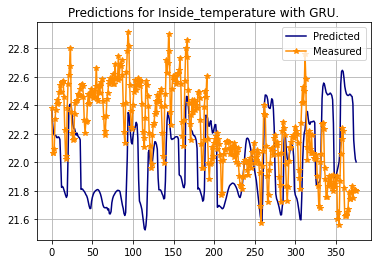

In [35]:
# Making test predictions with the RNN model.
preds = hvac_model.model.predict(x_test)

# Loading prediction intervals from disk.
low, up = hvac_model.load_intervals(r'C:\Users\romat\Documents\GitHub\HAMK_Smart_City\GRU_Inside_temperature_2022-01-10\pred_ints.csv')

# Inverse target variables both for measured values and computed predictions.
unpreds, uny_test = hvac_model.inv_target(x_test, preds, y_test)
low, up = hvac_model.inv_target(x_test, low, up)

# Plot model prediction alongside measured values.
# Add lower and upper intervals as arguments to plot them.
hvac_model.plot_preds(unpreds, uny_test)